Setup

In [1]:
import pandas as pd
import numpy as np
import missingno as mno # needed to visualize missing values. install missingno into conda if import does not work!
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import warnings
import vegafusion as vf #also needs module vl-convert-python
from sklearn.model_selection import train_test_split

vf.enable()
warnings.simplefilter(action='ignore', category=FutureWarning)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('vegafusion-inline')

Read Data

In [2]:
# Declare variables
data  = '..\\data\\'
# File names
top_songs_file = 'charts.csv'
million_songs_file = 'tracks_features.csv'
# Declare both dataframes
df_top_songs = pd.read_csv(data+top_songs_file)
df_million_songs = pd.read_csv(data+million_songs_file)

# Data Structure and preparation

In [3]:
df_top_songs

,track_id,name,country,date,position,streams,artists,artist_genres,duration,explicit
0,20IvMlpi4U5RuDnAlXSRiV,Crackküche,de,2021-04-15,82,625718,['Haftbefehl'],['german hip hop'],198746,False
1,0V1K6MU0utODk4yNqZKsFv,WATER,jp,2019-01-31,171,50896,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False
2,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-15,59,185439,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
3,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-22,133,111159,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
4,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-29,166,96204,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
...,...,...,...,...,...,...,...,...,...,...
5299303,7731grGgxDd7aBNpGOjm9k,När löven faller,se,2019-11-28,163,165644,['Ebbot Lundberg'],['swedish alternative rock'],252798,False
5299304,4Vm9XIi9AD1oK39xACmqk5,ワガママで誤魔化さないで,jp,2019-01-17,161,49580,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False
5299305,4Vm9XIi9AD1oK39xACmqk5,ワガママで誤魔化さないで,jp,2019-01-24,139,56826,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False
5299306,4Vm9XIi9AD1oK39xACmqk5,ワガママで誤魔化さないで,jp,2019-01-31,151,53897,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False


In [4]:
df_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299308 entries, 0 to 5299307
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   track_id       object
 1   name           object
 2   country        object
 3   date           object
 4   position       int64 
 5   streams        int64 
 6   artists        object
 7   artist_genres  object
 8   duration       int64 
 9   explicit       bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 368.9+ MB


In [5]:
df_million_songs

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [8]:
df_million_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

Find top songs in million songs data

In [9]:
df_million_songs[df_million_songs['id'] == '1selIVe40h0Ak2GVCzg5si']

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date


In [10]:
# Write first entry of artists back into the column 
# hoping that the first entry is always the main artist of the song found in the top song dataset)
df_million_songs['artists'] = df_million_songs.artists.apply(lambda x: eval(x)[0])
# rename columns to join on
df_top_songs.rename(columns = {'track_id':'id'}, inplace = True)
# Add column to identify top songs
df_top_songs['top_song'] = 1
# keep only columns to join on and top song column
df_top_songs = df_top_songs[['id','top_song','country','position','streams']]
# join on song name and artist performing
df_merged = pd.merge(df_top_songs,df_million_songs, on=['id'], how='right')
df_merged.head()


,id,top_song,country,position,streams,name,album,album_id,artists,artist_ids,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,NaN,NaN,NaN,NaN,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,NaN,NaN,NaN,NaN,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,NaN,NaN,NaN,NaN,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,NaN,NaN,NaN,NaN,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,NaN,NaN,NaN,NaN,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [11]:
# show values of time signature column
df_merged['time_signature'].value_counts()

4.0    1790764
3.0     180608
5.0      39923
1.0      21765
0.0       2809
Name: time_signature, dtype: int64

In [12]:
# show values of mode column
df_merged['mode'].value_counts()

1    1265212
0     770657
Name: mode, dtype: int64

In [13]:
# set all missing top song identifiers to 0 if not 1
# change column to category type
df_merged['top_song'] = df_merged['top_song'].fillna(0)
df_merged['top_song'] = df_merged['top_song'].astype('int')
df_merged['top_song'] = df_merged['top_song'].astype('category')
# change time signature to category
df_merged['time_signature'] = df_merged['time_signature'].astype('int')
df_merged['time_signature'] = df_merged['time_signature'].astype('category')
# change mode to category
df_merged['mode'] = df_merged['mode'].astype('int')
df_merged['mode'] = df_merged['mode'].astype('category')
# change explicit to category
df_merged['explicit'] = df_merged['explicit'].astype('int')
df_merged['explicit'] = df_merged['explicit'].astype('category')
# change track number and disk number to category
df_merged['track_number'] = df_merged['track_number'].astype('category')
df_merged['disc_number'] = df_merged['disc_number'].astype('category')
# drop release date, artists id and album id column
df_merged = df_merged.drop(['release_date','album_id','artist_ids'], axis = 1)
# change remaining object types to category
for col in df_merged.columns:
    if df_merged[col].dtype == object:
        df_merged[col] = df_merged[col].astype('category')

In [14]:
df_merged.head()

,id,top_song,country,position,streams,name,album,artists,track_number,disc_number,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,7lmeHLHBe4nmXzuXc0HDjk,0,NaN,NaN,NaN,Testify,The Battle Of Los Angeles,['Rage Against The Machine'],1,1,...,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4,1999
1,1wsRitfRRtWyEapl0q22o8,0,NaN,NaN,NaN,Guerrilla Radio,The Battle Of Los Angeles,['Rage Against The Machine'],2,1,...,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4,1999
2,1hR0fIFK2qRG3f3RF70pb7,0,NaN,NaN,NaN,Calm Like a Bomb,The Battle Of Los Angeles,['Rage Against The Machine'],3,1,...,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4,1999
3,2lbASgTSoDO7MTuLAXlTW0,0,NaN,NaN,NaN,Mic Check,The Battle Of Los Angeles,['Rage Against The Machine'],4,1,...,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4,1999
4,1MQTmpYOZ6fcMQc56Hdo7T,0,NaN,NaN,NaN,Sleep Now In the Fire,The Battle Of Los Angeles,['Rage Against The Machine'],5,1,...,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4,1999


In [15]:
# find duplicate songs by the same artist and remove them from the dataframe
duplicateRows = df_merged[df_merged.duplicated(['id','country'])]
duplicateRows

In [ ]:
df_merged = df_merged.drop(duplicateRows.index)

In [27]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204025 entries, 0 to 2035868
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   id                1204025 non-null  category
 1   top_song          1204025 non-null  category
 2   country           4629 non-null     category
 3   position          4629 non-null     float64 
 4   streams           4629 non-null     float64 
 5   name              1204025 non-null  category
 6   album             1204025 non-null  category
 7   artists           1204025 non-null  category
 8   track_number      1204025 non-null  category
 9   disc_number       1204025 non-null  category
 10  explicit          1204025 non-null  category
 11  danceability      1204025 non-null  float64 
 12  energy            1204025 non-null  float64 
 13  key               1204025 non-null  int64   
 14  loudness          1204025 non-null  float64 
 15  mode              1204025 non-nu

In [17]:
df_merged[df_merged['top_song'] == 1]

,id,top_song,country,position,streams,name,album,artists,track_number,disc_number,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
254,2x1D20z93vGEjtTP07GOOr,1,ie,116.0,52251.0,Swear It Again - Radio Edit,Westlife,['Westlife'],1,1,...,1,0.0276,0.29600,0.000000,0.1230,0.3300,130.076,247933,4,1999
255,5giCRvTkp5GV5UIAORAOof,1,ie,111.0,53221.0,If I Let You Go - Radio Edit,Westlife,['Westlife'],2,1,...,1,0.0294,0.00574,0.000000,0.0775,0.6360,181.987,221533,4,1999
256,30ngg6jCMqOBcvj5fLgfBe,1,ie,109.0,53538.0,Flying Without Wings,Westlife,['Westlife'],3,1,...,1,0.0318,0.32300,0.000000,0.2100,0.2830,72.742,215307,4,1999
257,5h9etcHD1K0OTljIAIw0Kh,1,ie,192.0,38888.0,Fool Again,Westlife,['Westlife'],4,1,...,1,0.0292,0.04680,0.000000,0.0530,0.5360,75.996,235067,4,1999
446,78XK5PDIKWiDKcgiLl1x0o,1,gb,26.0,1233833.0,Still Disappointed,Still Disappointed,['Stormzy'],1,1,...,1,0.2740,0.09430,0.000000,0.0807,0.7010,139.916,165027,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033761,09WAnxdBuebQopKhJT3oZS,1,global,66.0,10733416.0,TRELLAS,EL ÚLTIMO TOUR DEL MUNDO,['Bad Bunny'],12,1,...,1,0.0281,0.20000,0.000000,0.3240,0.0508,90.872,157673,4,2020
2033885,5jZ32WOU7sqzDYbzINwMUk,1,global,59.0,11066606.0,SORRY PAPI,EL ÚLTIMO TOUR DEL MUNDO,"['Bad Bunny', 'ABRA']",13,1,...,1,0.0851,0.06010,0.000000,0.1450,0.3930,191.911,163053,4,2020
2034142,3KJ3opyV29269SXkPrc19l,1,global,63.0,10957181.0,120,EL ÚLTIMO TOUR DEL MUNDO,['Bad Bunny'],14,1,...,0,0.0676,0.45100,0.000008,0.2870,0.4390,171.918,151506,4,2020
2035148,7kjEqI6eZ7YlFrGhxixnlN,1,global,53.0,11298839.0,ANTES QUE SE ACABE,EL ÚLTIMO TOUR DEL MUNDO,['Bad Bunny'],15,1,...,1,0.0577,0.50500,0.000047,0.3240,0.4730,139.988,221187,4,2020


Variable list and data splitting

In [18]:
# define outcome variable as y_label
y_label = 'top_song'
# select features
features = df_merged.drop(columns=[y_label]).columns.tolist()
# create feature data for data splitting
X = df_merged[features]
# create response for data splitting
y = df_merged[y_label]
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# data training set
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

# Data Exploration

In [19]:
df_explore = df_train.copy()

list_num = df_explore.select_dtypes(include=[np.number]).columns.to_list()

Descriptive Statistics

In [20]:
df_explore.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
position,3236.0,122.26,62.67,1.0,69.00,132.00,176.00,316.00
streams,3236.0,2152240.23,4290761.65,1057.0,64331.25,334809.50,2014397.50,58370367.00
danceability,842817.0,0.49,0.19,0.0,0.36,0.50,0.63,1.00
energy,842817.0,0.51,0.29,0.0,0.25,0.52,0.77,1.00
key,842817.0,5.20,3.54,0.0,2.00,5.00,8.00,11.00
loudness,842817.0,-11.81,6.98,-60.0,-15.25,-9.79,-6.72,7.23
speechiness,842817.0,0.08,0.12,0.0,0.04,0.04,0.07,0.97
acousticness,842817.0,0.45,0.39,0.0,0.04,0.39,0.86,1.00
instrumentalness,842817.0,0.28,0.38,0.0,0.00,0.01,0.72,1.00
liveness,842817.0,0.20,0.18,0.0,0.10,0.12,0.24,1.00


In [21]:
q1 = df_explore.quantile(q = 0.25)
q3 = df_explore.quantile(q = 0.75)
iqr = q3-q1
iqr

position            1.070000e+02
streams             1.950066e+06
danceability        2.770000e-01
energy              5.140000e-01
key                 6.000000e+00
loudness            8.534000e+00
speechiness         3.710000e-02
acousticness        8.234000e-01
instrumentalness    7.189925e-01
liveness            1.482000e-01
valence             4.520000e-01
tempo               4.295000e+01
duration_ms         1.116800e+05
year                1.300000e+01
dtype: float64

In [22]:
# inspect correlation   
corr = df_merged.corr()
corr.style.background_gradient(cmap='Blues')

,position,streams,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
position,1.000000,-0.347389,-0.138228,0.007379,0.001439,-0.029881,-0.050875,0.022188,0.030607,0.016664,0.011765,-0.021194,0.092688,-0.263910
streams,-0.347389,1.000000,0.139588,-0.022918,-0.004465,0.055469,0.080318,-0.077452,-0.041832,-0.003234,-0.018116,0.007674,-0.065598,0.131616
danceability,-0.138228,0.139588,1.000000,0.283016,0.018633,0.378194,0.209859,-0.285750,-0.285331,-0.044328,0.563436,0.060590,-0.135413,0.069507
energy,0.007379,-0.022918,0.283016,1.000000,0.034452,0.817934,0.130813,-0.796242,-0.252131,0.213494,0.399531,0.268231,-0.037603,0.144009
key,0.001439,-0.004465,0.018633,0.034452,1.000000,0.021622,0.022998,-0.027901,-0.014915,0.004419,0.024834,0.006202,-0.005822,0.003915
loudness,-0.029881,0.055469,0.378194,0.817934,0.021622,1.000000,0.062403,-0.671553,-0.393037,0.138123,0.385005,0.246248,-0.051889,0.172585
speechiness,-0.050875,0.080318,0.209859,0.130813,0.022998,0.062403,1.000000,-0.082375,-0.167551,0.189012,0.099680,0.007745,-0.078870,0.058225
acousticness,0.022188,-0.077452,-0.285750,-0.796242,-0.027901,-0.671553,-0.082375,1.000000,0.244132,-0.115001,-0.268836,-0.231021,0.002517,-0.151550
instrumentalness,0.030607,-0.041832,-0.285331,-0.252131,-0.014915,-0.393037,-0.167551,0.244132,1.000000,-0.118987,-0.284707,-0.071455,0.121323,-0.007839
liveness,0.016664,-0.003234,-0.044328,0.213494,0.004419,0.138123,0.189012,-0.115001,-0.118987,1.000000,0.062662,0.030149,0.005906,-0.015360


[Text(0.5, 1.0, 'Multicolinearity Check')]

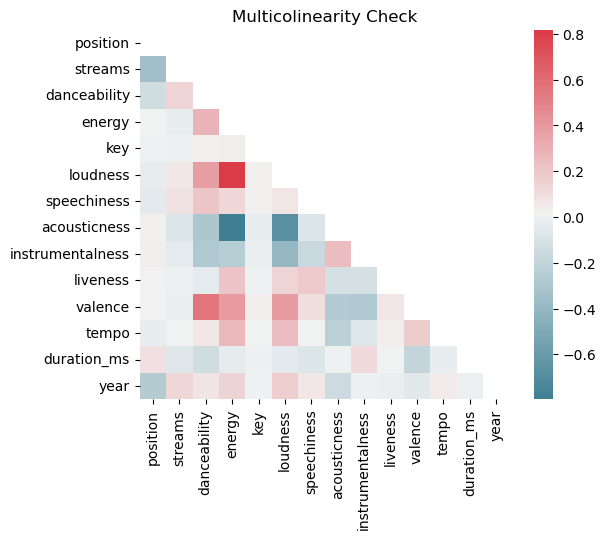

In [23]:
# visualize correlation matrix
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=False,  square=True, annot_kws={"size": 12}).set(title="Multicolinearity Check")

Visual analysis

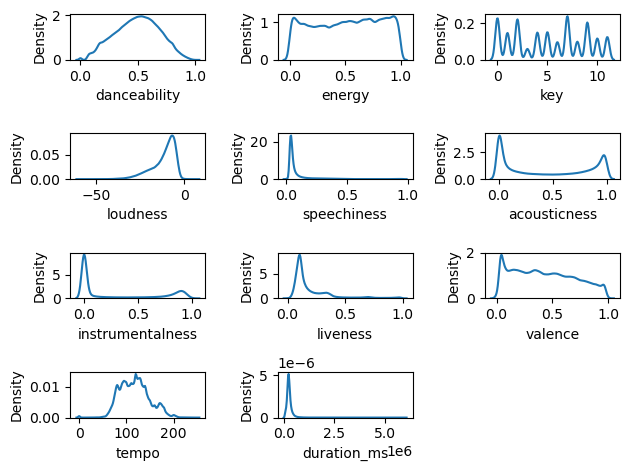

In [ ]:
# plt.subplot(4,3,1)
# sns.kdeplot(data=df_merged, 
#             x='danceability'
#             )

# plt.subplot(4,3,2)
# sns.kdeplot(data=df_merged, 
#             x='energy'
#             )

# plt.subplot(4,3,3)
# sns.kdeplot(data=df_merged, 
#             x='key'
#             )

# plt.subplot(4,3,4)
# sns.kdeplot(data=df_merged, 
#             x='loudness'
#             )

# plt.subplot(4,3,5)
# sns.kdeplot(data=df_merged, 
#             x='speechiness'
#             )

# plt.subplot(4,3,6)
# sns.kdeplot(data=df_merged, 
#             x='acousticness'
#             )

# plt.subplot(4,3,7)
# sns.kdeplot(data=df_merged, 
#             x='instrumentalness'
#             )

# plt.subplot(4,3,8)
# sns.kdeplot(data=df_merged, 
#             x='liveness'
#             )

# plt.subplot(4,3,9)
# sns.kdeplot(data=df_merged, 
#             x='valence'
#             )

# plt.subplot(4,3,10)
# sns.kdeplot(data=df_merged, 
#             x='tempo'
#             )

# plt.subplot(4,3,11)
# sns.kdeplot(data=df_merged, 
#             x='duration_ms'
#             )

# plt.tight_layout()
# plt.show()

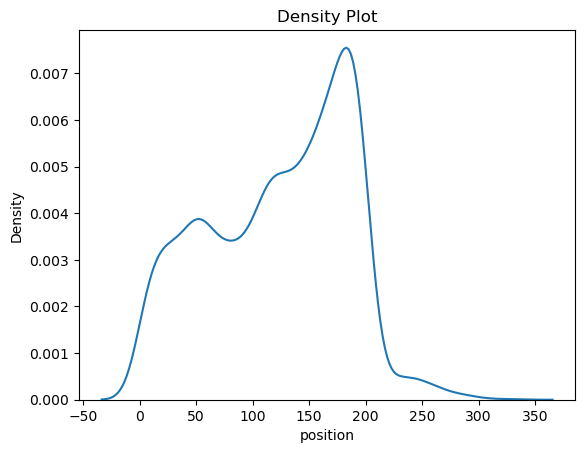

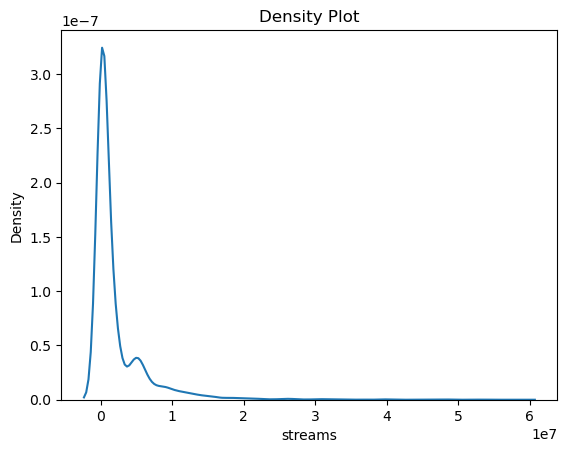

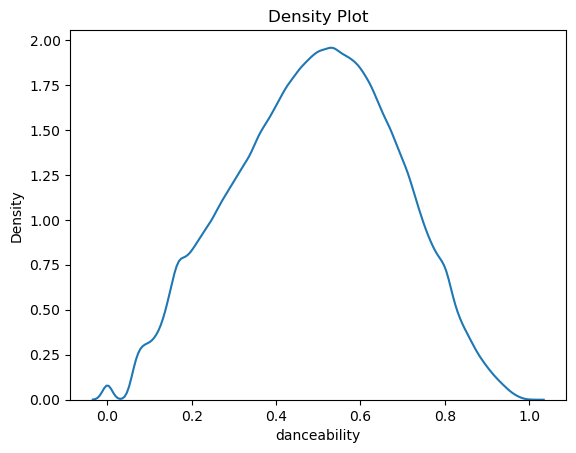

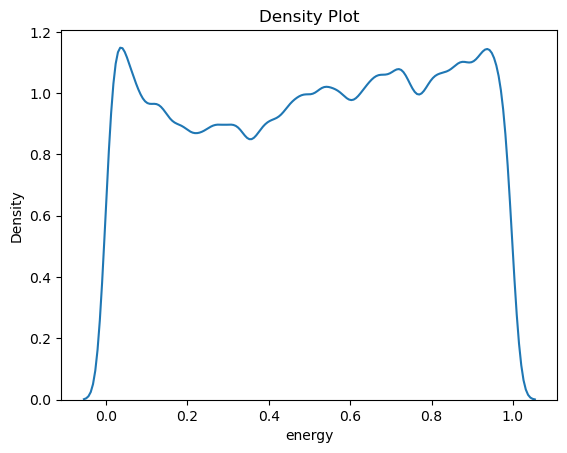

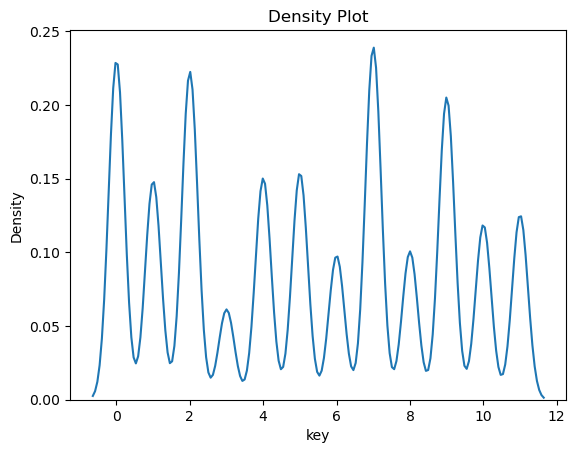

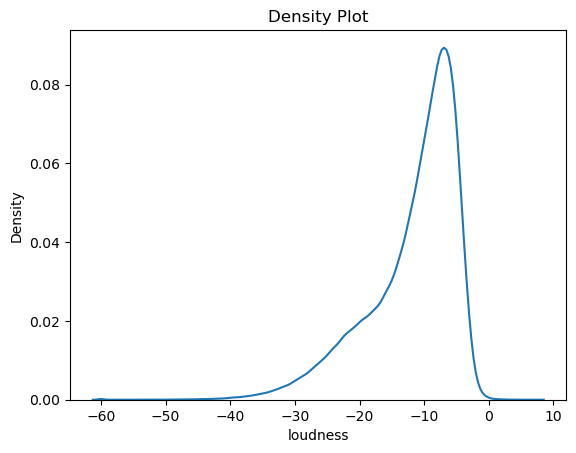

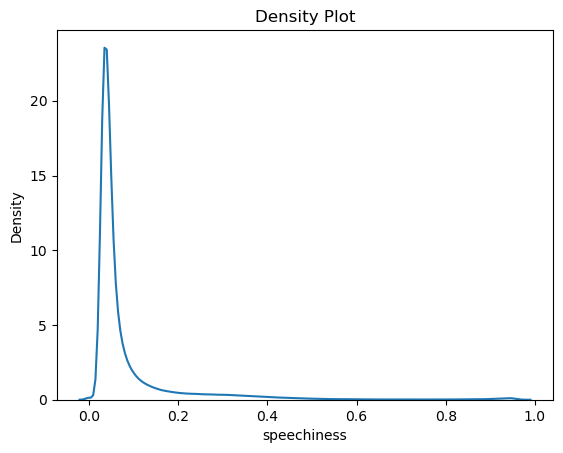

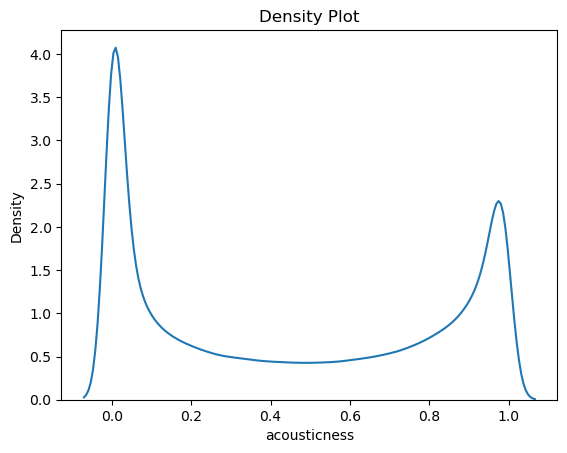

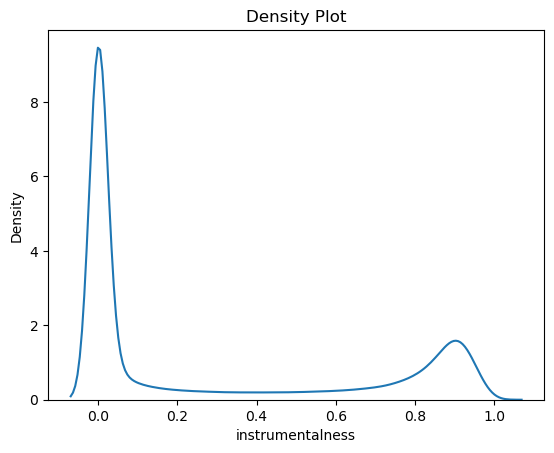

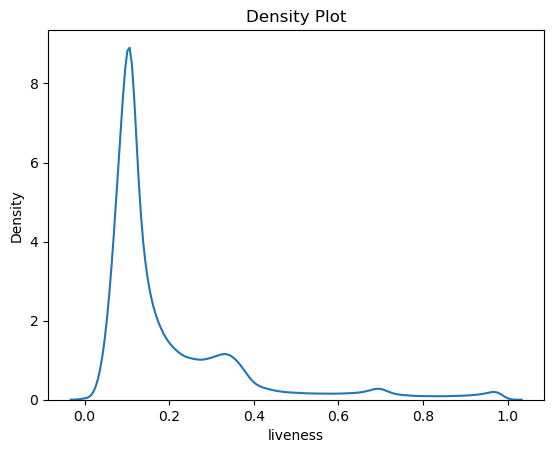

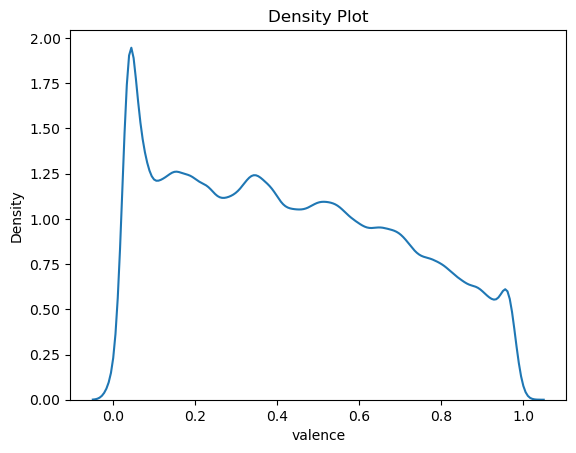

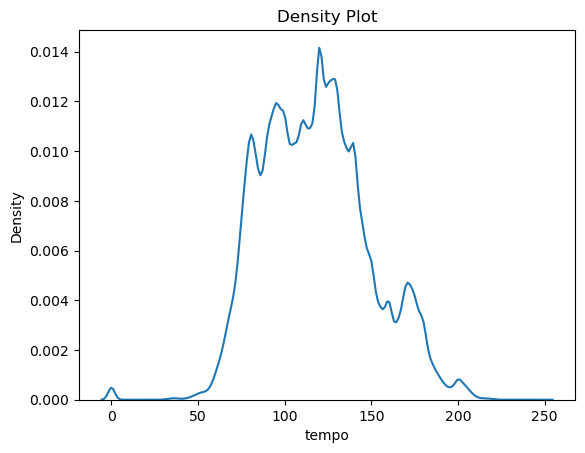

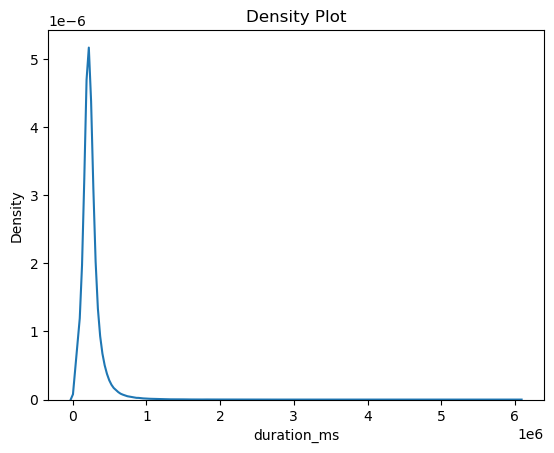

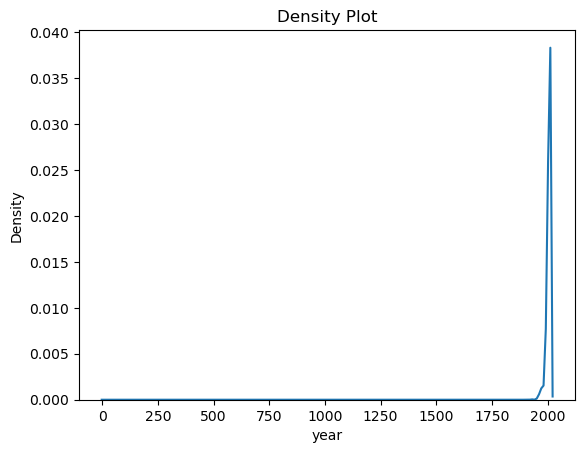

In [24]:
# Make a boxplot for every numerical variable in relation to top song label
def print_kde(df, x_var):    
    ax = sns.kdeplot(data=df, 
            x=x_var
            )
    ax.set_title('Density Plot')
    ax.set_xlabel(x_var)
    plt.suptitle('')

for col in list_num:
    print_kde(df_merged, col)
    plt.show()


Top song classification analysis

In [25]:
# Stacked bar plots for categories mode and explicit in relation to top songs
mode = alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('count(mode)', stack="normalize"),
    y='top_song',
    color='mode'
)
mode.title = 'Percentage of mode per top song'

explicit = alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('count(explicit)', stack="normalize"),
    y='top_song',
    color='explicit'
)
explicit.title = 'Percentage of explicit per top song'

chart = alt.vconcat(mode, explicit)

chart

alt.VConcatChart(...)

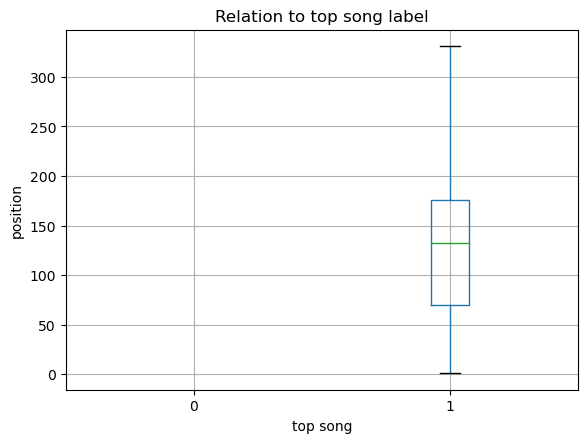

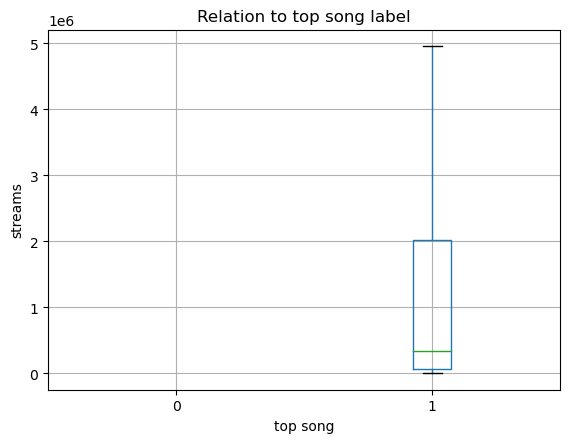

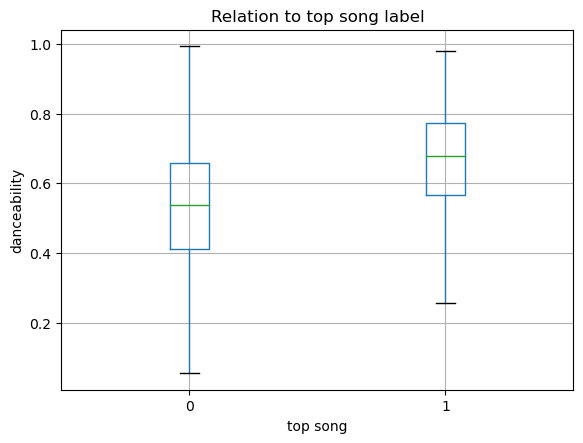

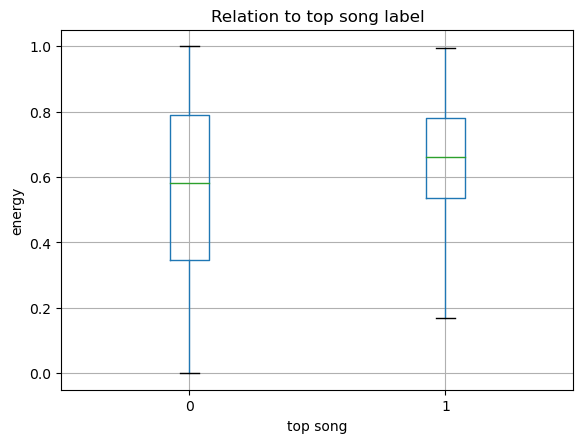

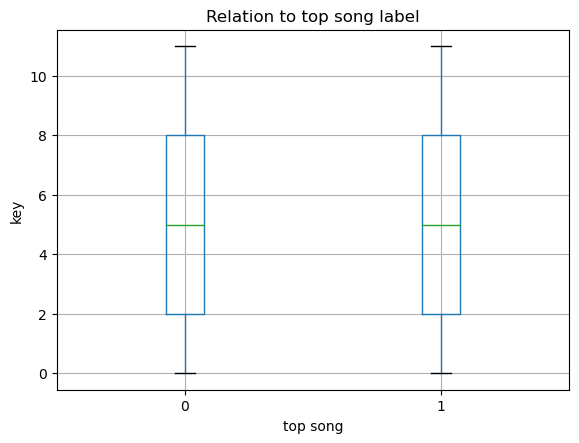

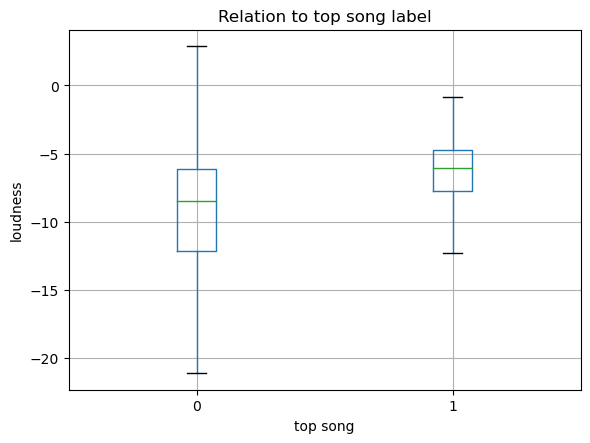

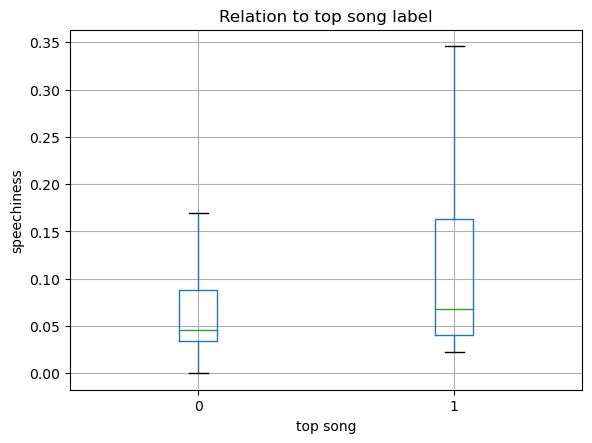

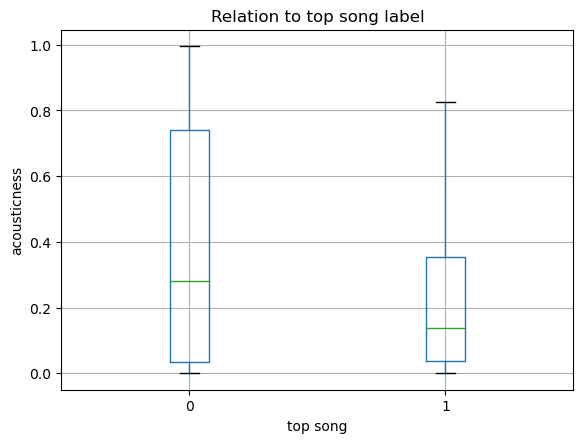

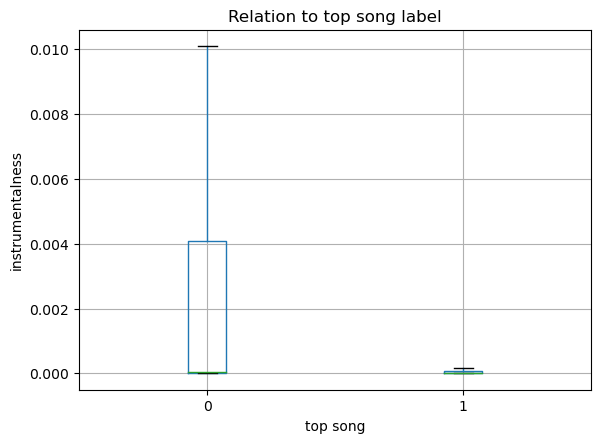

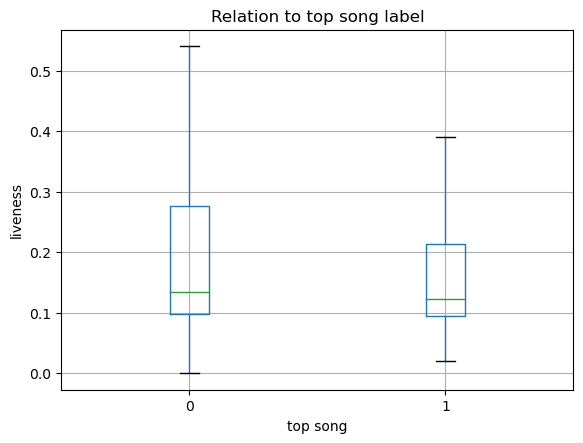

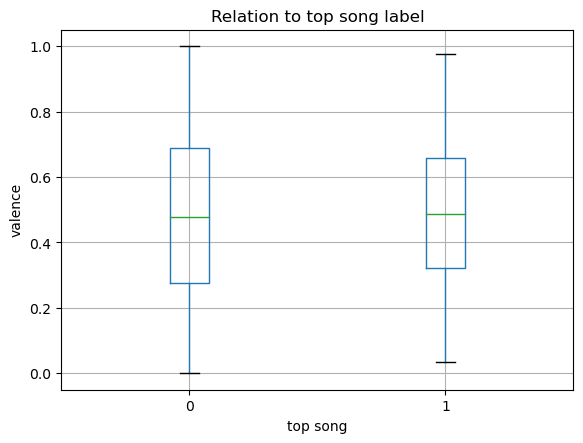

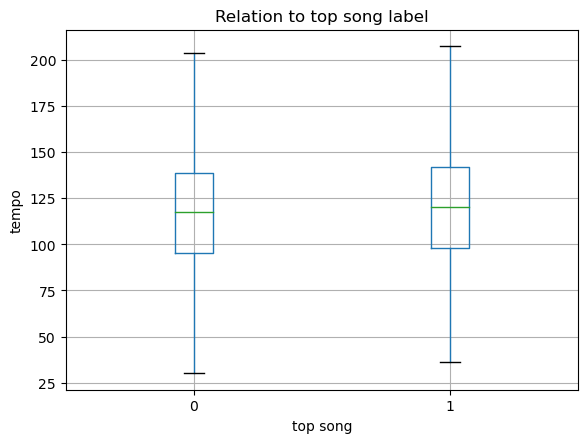

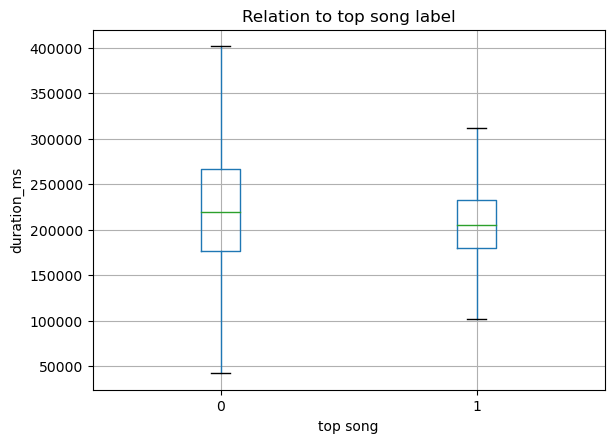

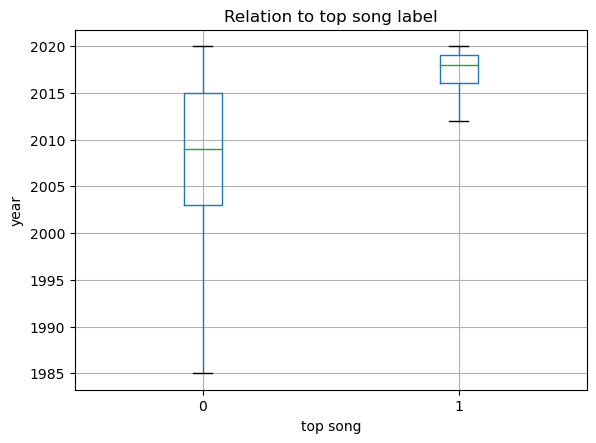

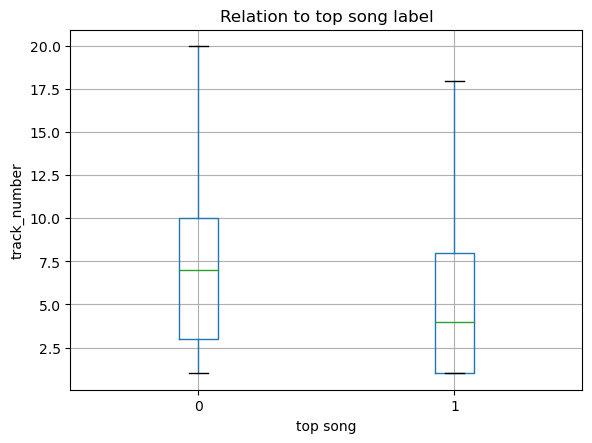

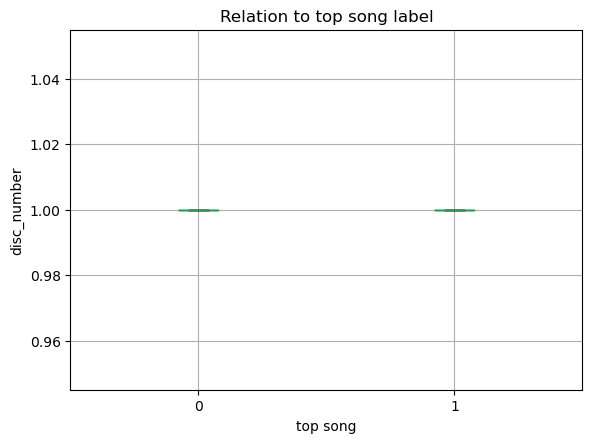

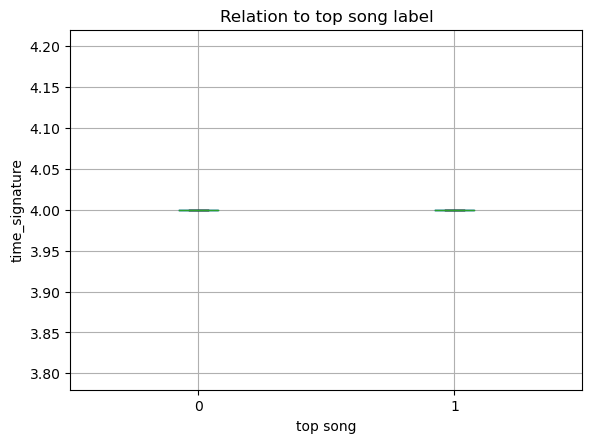

In [26]:
# Make a boxplot for every numerical variable in relation to top song label
def print_boxplot(df, y_var):
    df = df[(df['instrumentalness'] < 0.2)]
    
    ax = df.boxplot(column=y_var, by='top_song', showfliers=False)
    ax.set_title('Relation to top song label')
    ax.set_xlabel('top song')
    ax.set_ylabel(y_var)
    plt.suptitle('')

list_num.append('track_number')
list_num.append('disc_number')
list_num.append('time_signature')

for col in list_num:
    print_boxplot(df_merged, col)
    plt.show()


First Results

* use million song dataset 
* Missing songs from top song dataframe should be added to million song dataframe  - only 537 songs from top song in million song dataframe labelled (join on artist and song name?)
* remove columns with ids for model
* keep either year or release date for model
* standard scale for numerical values 
* no outliers (tempo needs to be checked more because values of 0 dont make sense)
* some columns are identical, duplicates need to be filtered
* Energy and loudness have a strong positive correlation - drop one?
* valence and danceability also have a positive correlation - drop one?
* Acousticness and energy as well as loudness correlate strong negatively - drop one / both?
* mode more 0 for top songs, relatively low difference (~ 10%)
* explicit more 1 for top songs, relatively low difference (~ 10%) 
* danceability, loudness, energy seem to have strong impact on top song
* key could also be a factor
* interpret difference box plot year and track number - why is it this different?
